# **Datascience_project2**

# [목차]

> ### 1. Data 소개
> ### 2. Data 불러온 후 확인
> ### 3. Data 전처리
>> #### 3-1. Label Encoding
>> #### 3-2. 상관계수를 통한 이상치 제거
>> #### 3-3. Train/Test Set 구분
>> #### 3-4. Normalize
> ### 4. KNN(K-nearest neighbors)
> ### 5. K-means clustering
> ### 6. Linear Regression
>> #### 6-1. Linear Regression with sklearn
>> #### 6-2. PCA
>> #### 6-3. Using regularized methods for regression
>> #### 6-4. 공선성을 유발하는 변수를 제거한 데이터프레임을 이용해 linear regression
> ### 7. Nonlinear regression
> ### 8. Polynomial Regression

# 1. Data 소개

| 본 데이터('Algerian_forest_fires_dataset_UPDATE')는 122개의 행과 14개의 열로 구성되어 있으며, 알제리의 북동쪽에 위치한 베자아 지역의 2012년 6월부터 2012년 9월까지의 기간동안 11개의 속성과 1개의 출력 속성(Classes)이 포함된다.
attribute에는 Date, Temp, RH, Ws, Rain, FFMC, DMC, ISI, BUI, FWI, Classes와 같은 세부 정보를 포함한다.

자료 출처 : https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset

<strong> 1) attribute 설명 </strong>

- day : 일
- month : 월 (6 ~ 9)
- year : 년 (2012)
- Temperature : 온도 (°C)
- RH : 상대 습도 (%)
- Ws : 풍속 (km/h)
- Rain : 하루 총 강수량 (mm)
- FFMC : 미세 연료 수분 코드
- DMC : 더프 수분 코드
- DC : 가뭄 코드
- ISI : 초기 확산 지수
- BUI : 연소에 사용 가능한 연료의 총량에 대한 숫자 등급
- FWI : 화재 기상 지수 (화재의 잠재력을 나타내는 핵심 지표)
- Classes : fire / not fire

# 2. Data 불러온 후 확인

In [1]:
import math
import seaborn as sns
import pandas as pd

In [2]:
# 파일 불러오기
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")
df.columns = [x.rstrip() for x in df.columns]

In [3]:
# 데이터 상위 10개 표시
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


In [5]:
# 결측치 확인
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

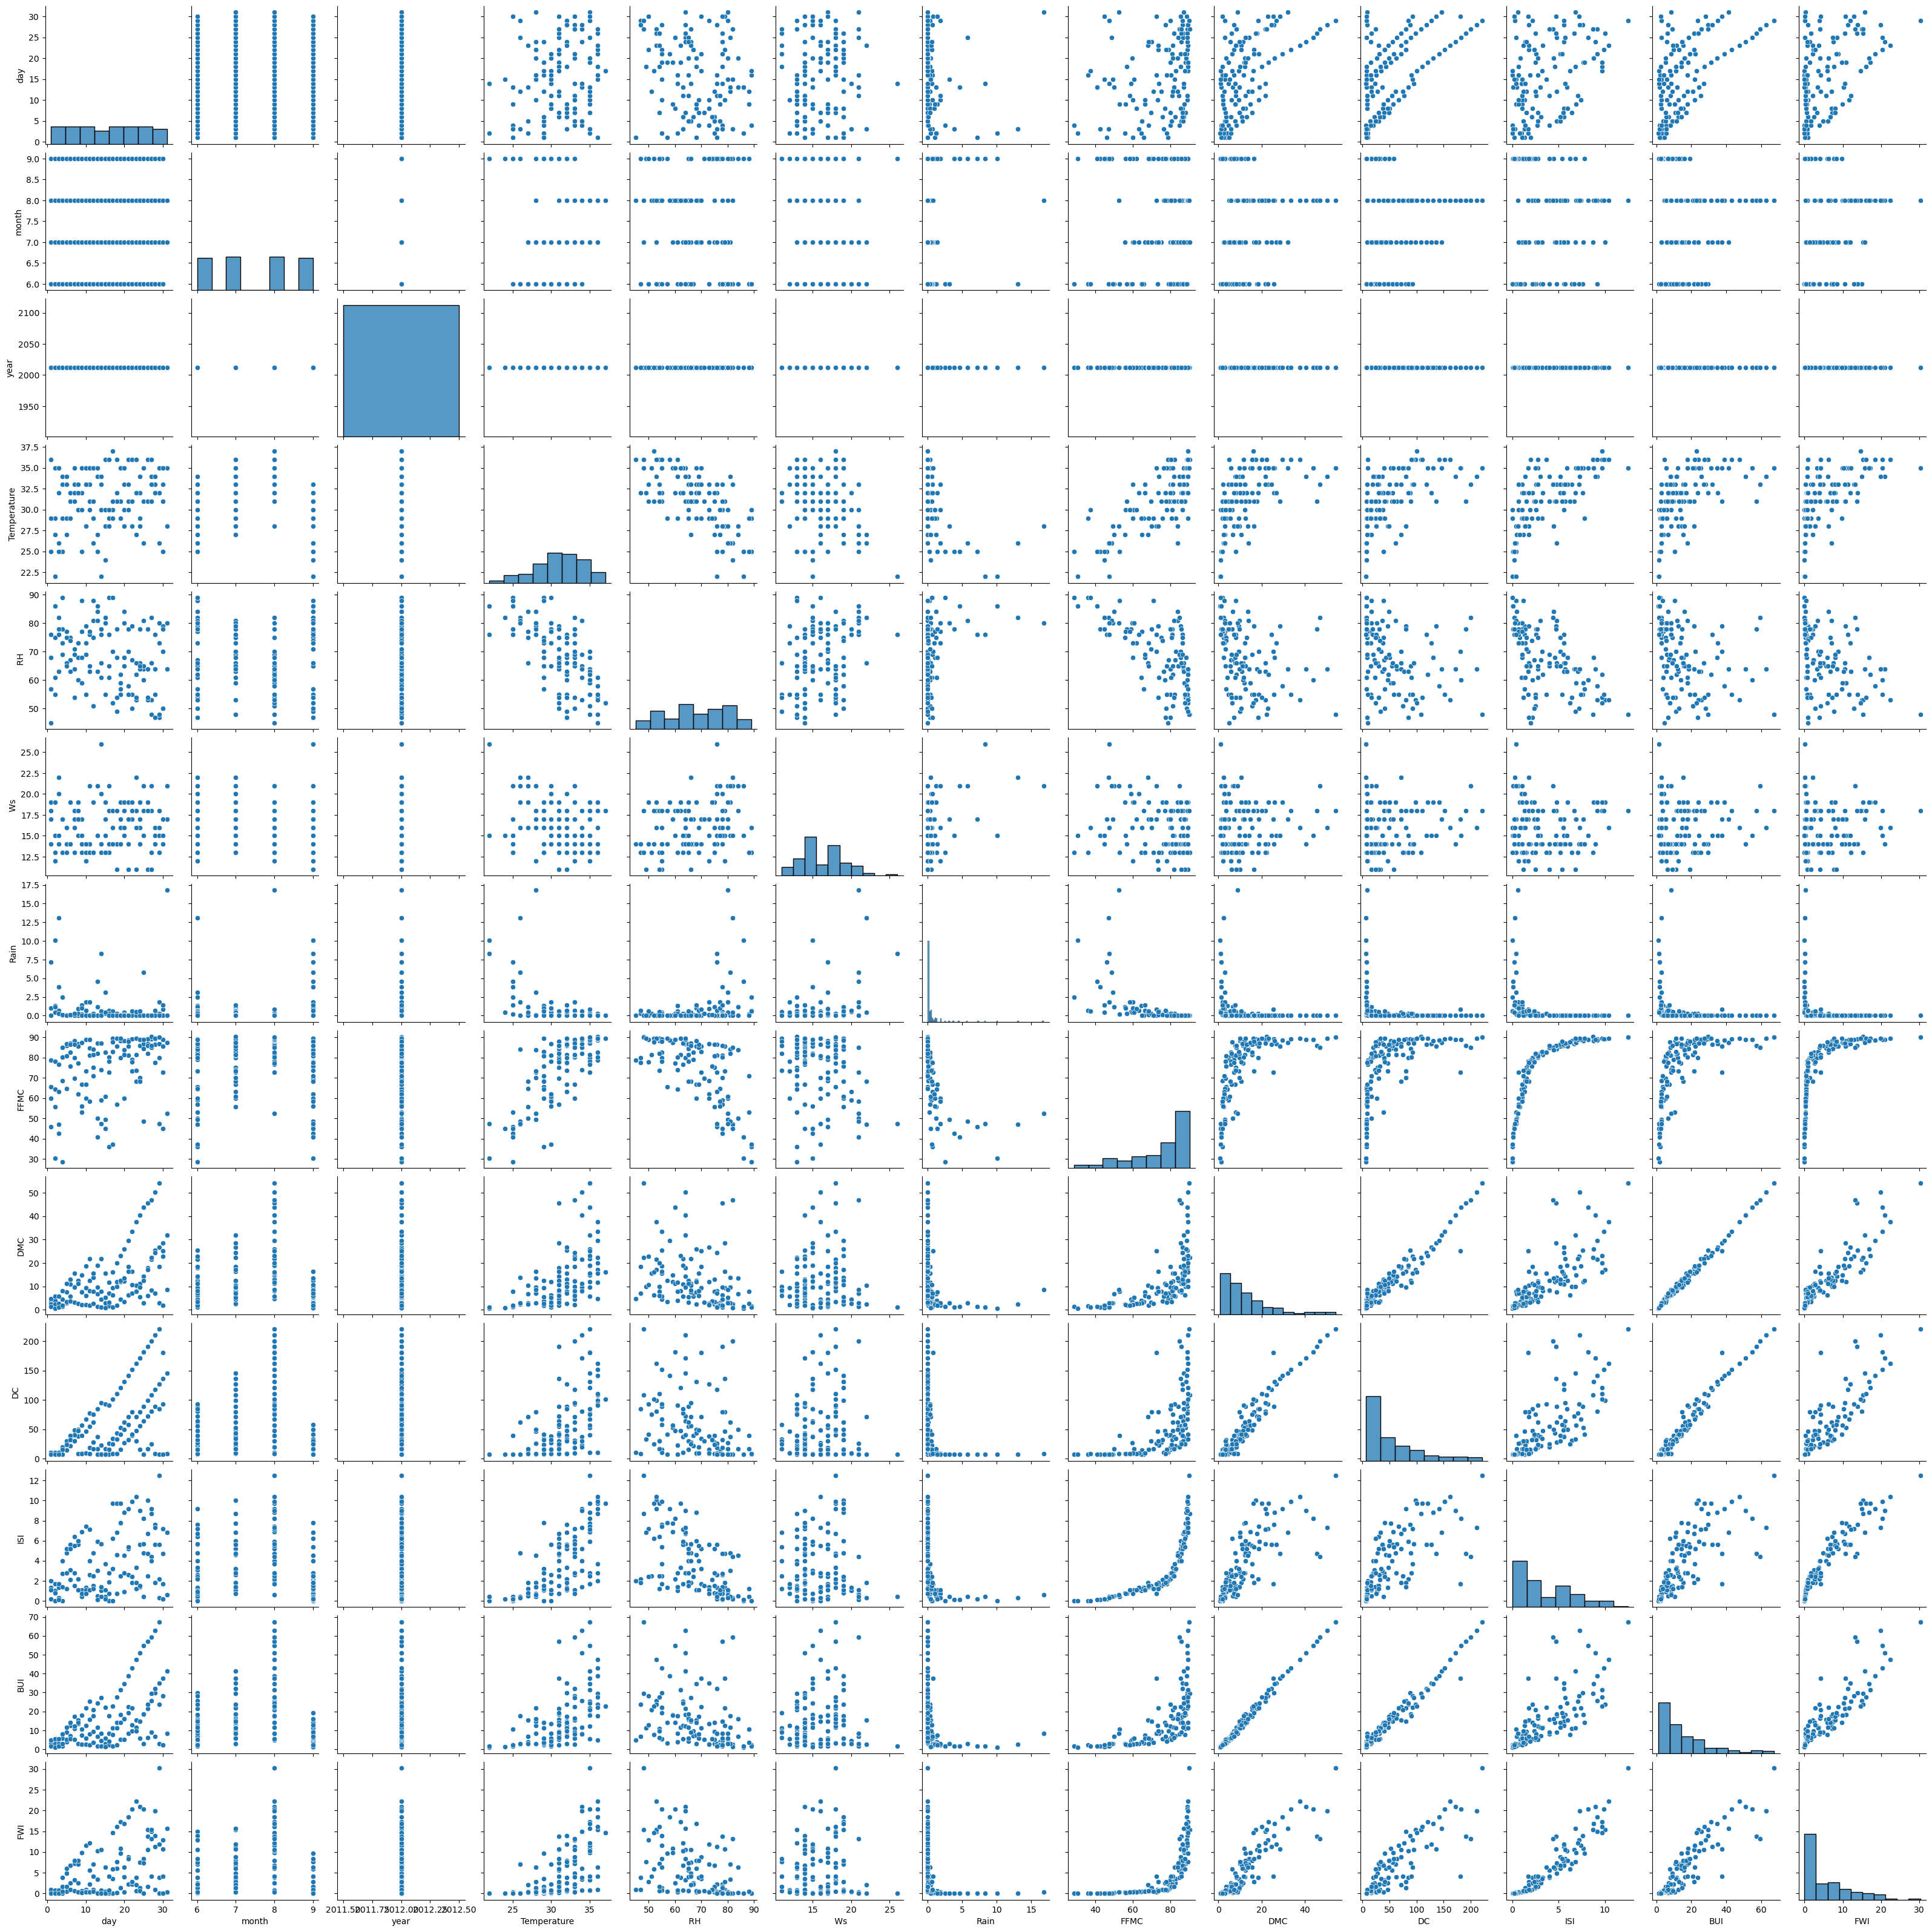

In [6]:
sns.pairplot(df)

# 3. Data 전처리

## 3-1. Label Encoding

In [7]:
# object형 변수 'Classes' label encoding
df['Classes'].replace({'fire': 0, 'not fire': 1}, inplace=True)
df_Fire = pd.DataFrame(df['Classes'])

In [8]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,0
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,1


In [9]:
# 사용하지 않는 열 제거
df = df.drop(['day', 'month', 'year', 'FFMC', 'DMC', 'BUI'], axis=1)
df.head()

,Temperature,RH,Ws,Rain,DC,ISI,FWI,Classes
0,29,57,18,0.0,7.6,1.3,0.5,1
1,29,61,13,1.3,7.6,1.0,0.4,1
2,26,82,22,13.1,7.1,0.3,0.1,1
3,25,89,13,2.5,6.9,0.0,0.0,1
4,27,77,16,0.0,14.2,1.2,0.5,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  122 non-null    int64  
 1    RH          122 non-null    int64  
 2    Ws          122 non-null    int64  
 3   Rain         122 non-null    float64
 4   DC           122 non-null    float64
 5   ISI          122 non-null    float64
 6   FWI          122 non-null    float64
 7   Classes      122 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 7.8 KB


## 3-2. 상관계수를 통한 이상치 제거

In [11]:
corr = df.drop(columns=['FWI']).corr()
corr.style.background_gradient(cmap='coolwarm')

,Temperature,RH,Ws,Rain,DC,ISI,Classes
Temperature,1.000000,-0.660151,-0.228035,-0.486947,0.532838,0.663871,-0.497810
RH,-0.660151,1.000000,0.245774,0.329163,-0.314271,-0.586410,0.377328
Ws,-0.228035,0.245774,1.000000,0.349321,0.099231,-0.039266,0.121408
Rain,-0.486947,0.329163,0.349321,1.000000,-0.283652,-0.366425,0.334392
DC,0.532838,-0.314271,0.099231,-0.283652,1.000000,0.717591,-0.588464
ISI,0.663871,-0.586410,-0.039266,-0.366425,0.717591,1.000000,-0.831796
Classes,-0.497810,0.377328,0.121408,0.334392,-0.588464,-0.831796,1.000000


In [12]:
# 'FWI' 변수와의 상관관계 확인
df_corr = df.corr()['FWI'].sort_values(ascending=False)
df_corr

FWI            1.000000
ISI            0.944062
DC             0.869911
Temperature    0.608367
 Ws            0.029637
Rain          -0.292914
 RH           -0.476067
Classes       -0.759758
Name: FWI, dtype: float64

'FWI' 변수와 다른 변수들의 상관관계를 확인하여 값이 0.5 이상인 변수들에 대해 이상치를 제거하고자 한다.

In [13]:
df_corr_feats = df_corr.index[1:4]
df_corr_feats

Index(['ISI', 'DC', 'Temperature'], dtype='object')

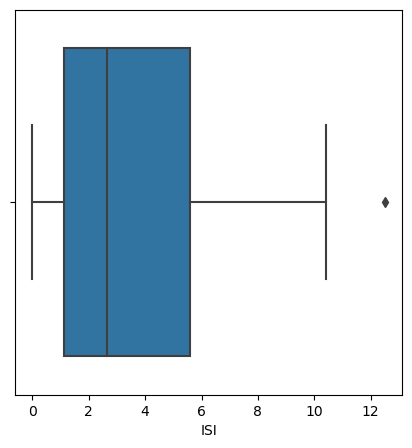

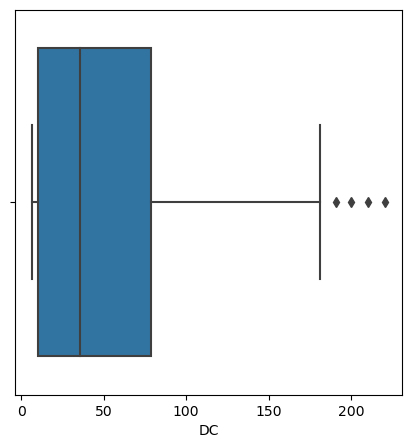

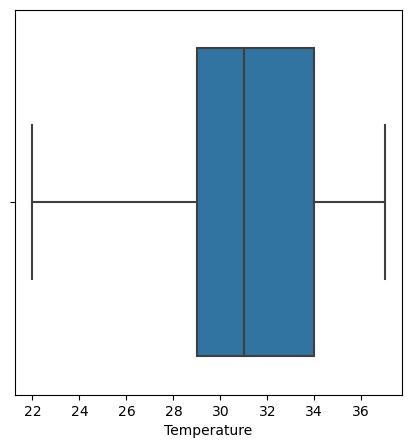

In [14]:
# 'FWI' 변수와 다른 변수들 간 상관계수 확인 후 값이 높은 변수들의 데이터 분포를 Boxplot으로 확인
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import seaborn as sns
for feat in df_corr_feats:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=feat, data=df)
    plt.xlabel(feat)

In [15]:
# 상관관계가 높은 변수에서 이상치 제거
df = df[(df["ISI"] < 12)]
df = df[(df["DC"] < 200)]
df = df[(df["Temperature"] > 22)]
df

,Temperature,RH,Ws,Rain,DC,ISI,FWI,Classes
0,29,57,18,0.0,7.6,1.3,0.5,1
1,29,61,13,1.3,7.6,1.0,0.4,1
2,26,82,22,13.1,7.1,0.3,0.1,1
3,25,89,13,2.5,6.9,0.0,0.0,1
4,27,77,16,0.0,14.2,1.2,0.5,1
...,...,...,...,...,...,...,...,...
117,31,54,11,0.0,16.3,2.5,1.7,1
118,31,66,11,0.0,24.9,4.0,4.1,0
119,32,47,14,0.7,8.8,1.8,0.9,1
120,26,80,16,1.8,7.7,0.3,0.1,1


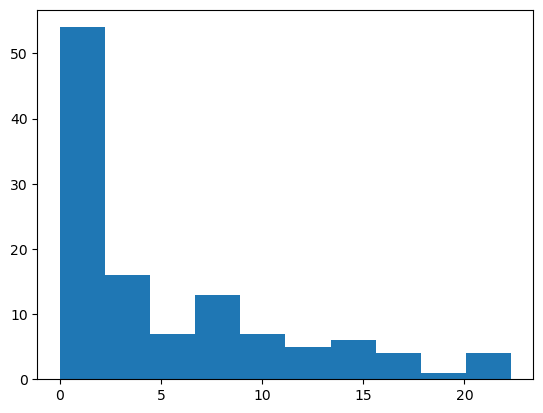

In [16]:
# 'FWI' 변수 분포 파악
plt.hist(df['FWI'])
plt.show()

## 3-3. Train/Test Set 구분

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [18]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.2):
    markers=('s', 'x', 'o', '^', 'v')
    colors=['red','blue','lightgreen','gray','cyan']
    cmap=ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolor='black')

    # 테스트 샘플 부각
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

In [19]:
# 독립 변수와 종속 변수 설정
X1 = df[['DC', 'ISI']]
X2 = df[['DC', 'Temperature']]
X3 = df[['ISI', 'Temperature']]
y = df['Classes'].values.astype('int64')

Classification을 진행하기 위해 종속 변수를 명목형 변수인 'Classes'로 설정하였다.

In [20]:
len(X1), len(y)

(117, 117)

In [21]:
len(X2), len(y)

(117, 117)

In [22]:
len(X3), len(y)

(117, 117)

In [23]:
# train/test set 분류
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train, y_test = train_test_split(
    X1, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train, y_test = train_test_split(
    X2, y, test_size=0.3, random_state=1)
X_train3, X_test3, y_train, y_test = train_test_split(
    X3, y, test_size=0.3, random_state=1)

In [24]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [56 61]
Labels counts in y_train: [38 43]
Labels counts in y_test: [18 18]


## 3-4. Normalize

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train1)
X_train_std1 = sc.transform(X_train1)
X_test_std1 = sc.transform(X_test1)

print(np.mean(X_train_std1), np.std(X_train_std1))
print(np.mean(X_test_std1), np.std(X_test_std1))

-4.797259982948207e-17 1.0
0.03605963473755534 1.029790365059155


In [26]:
sc = StandardScaler()
sc.fit(X_train2)
X_train_std2 = sc.transform(X_train2)
X_test_std2 = sc.transform(X_test2)

print(np.mean(X_train_std2), np.std(X_train_std2))
print(np.mean(X_test_std2), np.std(X_test_std2))

-2.0902347068560045e-16 1.0
0.0952070159182346 0.9810451907367962


In [27]:
sc = StandardScaler()
sc.fit(X_train3)
X_train_std3 = sc.transform(X_train3)
X_test_std3 = sc.transform(X_test3)

print(np.mean(X_train_std3), np.std(X_train_std3))
print(np.mean(X_test_std3), np.std(X_test_std3))

-1.6790409940318726e-16 1.0
0.17439168689684037 0.9853633754206185


# 4. KNN(K-nearest neighbors)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# 독립변수 X1에 대한 KNN
X_combined_std1 = np.vstack((X_train_std1, X_test_std1))
y_combined = np.hstack((y_train, y_test))

X_combined_std_np1 = np.array(X_combined_std1)
y_combined_np = np.array(y_combined)

knn = KNeighborsClassifier(n_neighbors=3, p=2,
                           metric='minkowski')
knn.fit(X_train_std1, y_train)

y_pred = knn.predict(X_test_std1)

C:\Users\eun04\AppData\Local\Temp\ipykernel_26664\2644791820.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y=X[y==cl,1],


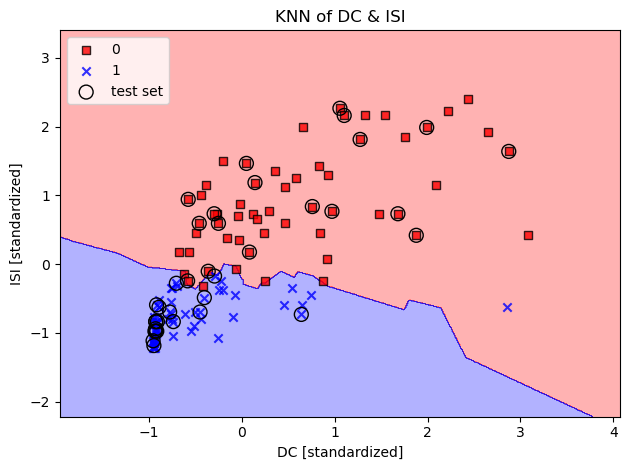

In [29]:
plot_decision_regions(X_combined_std1, y_combined,
                      classifier=knn, test_idx=range(81, 117), resolution=0.01)

plt.title('KNN of DC & ISI')
plt.xlabel('DC [standardized]')
plt.ylabel('ISI [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
(knn.predict(X_test_std1) == y_test).mean()

1.0

X1에 대한 Classification을 진행한 결과, test data에 대한 정확도가 1.0으로 매우 높은 값이 도출되었다.
과적합 발생 가능성을 고려해 'n_neighbors' 매개변수 값을 증가하여 더 일반화된 모델로 분류하는 과정을 진행하였다.

C:\Users\eun04\AppData\Local\Temp\ipykernel_26664\2644791820.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y=X[y==cl,1],


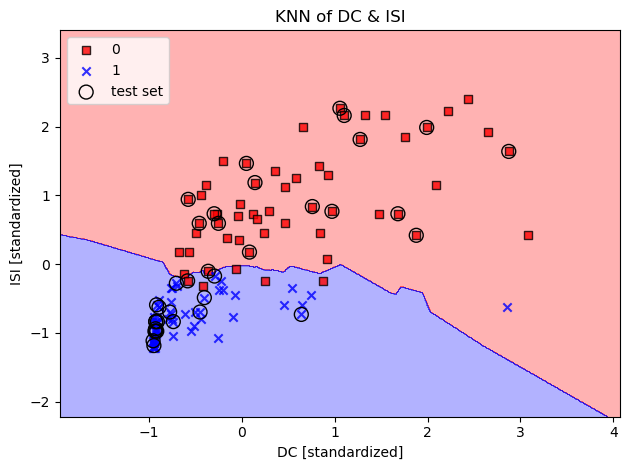

In [31]:
from sklearn.metrics import accuracy_score
# n_neighbors 수 조절
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')
knn.fit(X_train_std1, y_train)

y_pred = knn.predict(X_test_std1)

plot_decision_regions(X_combined_std1, y_combined,
                      classifier=knn, test_idx=range(81, 117), resolution=0.01)

plt.title('KNN of DC & ISI')
plt.xlabel('DC [standardized]')
plt.ylabel('ISI [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [32]:
(knn.predict(X_test_std1) == y_test).mean()

0.9722222222222222

매개변수 값을 조정한 후 정확도를 재측정한 결과 과적합이 발생할 가능성을 감소시켰음을 확인하였다.

In [33]:
# 독립변수 X2에 대한 KNN
X_combined_std2 = np.vstack((X_train_std2, X_test_std2))
y_combined = np.hstack((y_train, y_test))

X_combined_std_np2 = np.array(X_combined_std2)
y_combined_np = np.array(y_combined)

knn = KNeighborsClassifier(n_neighbors=3, p=2,
                           metric='minkowski')
knn.fit(X_train_std2, y_train)

y_pred = knn.predict(X_test_std2)

C:\Users\eun04\AppData\Local\Temp\ipykernel_26664\2644791820.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y=X[y==cl,1],


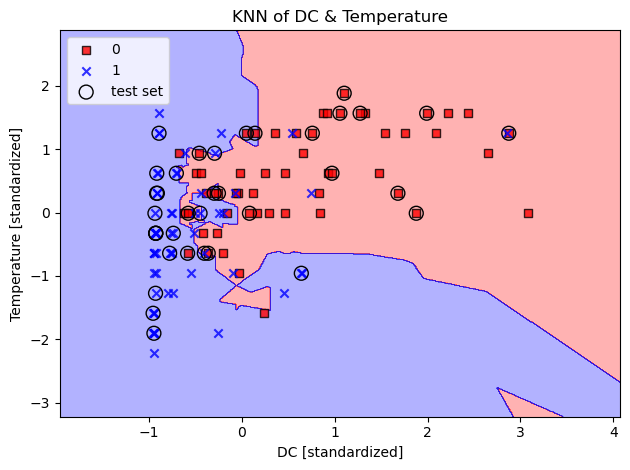

In [34]:
plot_decision_regions(X_combined_std2, y_combined,
                      classifier=knn, test_idx=range(81, 117), resolution=0.01)

plt.title('KNN of DC & Temperature')
plt.xlabel('DC [standardized]')
plt.ylabel('Temperature [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [35]:
(knn.predict(X_test_std2) == y_test).mean()

0.8333333333333334

In [36]:
# 독립변수 X3에 대한 KNN
X_combined_std3 = np.vstack((X_train_std3, X_test_std3))
y_combined = np.hstack((y_train, y_test))

X_combined_std_np3 = np.array(X_combined_std3)
y_combined_np = np.array(y_combined)

knn = KNeighborsClassifier(n_neighbors=3, p=2,
                           metric='minkowski')
knn.fit(X_train_std3, y_train)

y_pred = knn.predict(X_test_std1)

C:\Users\eun04\AppData\Local\Temp\ipykernel_26664\2644791820.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y=X[y==cl,1],


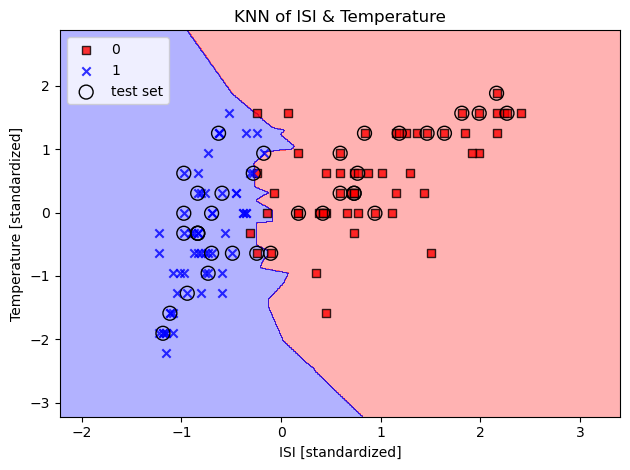

In [37]:
plot_decision_regions(X_combined_std3, y_combined,
                      classifier=knn, test_idx=range(81, 117), resolution=0.01)

plt.title('KNN of ISI & Temperature')
plt.xlabel('ISI [standardized]')
plt.ylabel('Temperature [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
(knn.predict(X_test_std3) == y_test).mean()

0.9722222222222222

KNN 모델의 정확도를 계산한 결과, 'n_neighbors' 값이 3일 때 'DC'와 'ISI' 변수가 표준화된 test data에 대하여 가장 높은 정확도를 나타낸다는 것을 확인하였다. 하지만 이 경우에는 과적합이 발생할 가능성이 높기 때문에 이를 고려하여 각각의 독립변수에 대해 가장 적절한 'n_neighbors' 값을 찾는 과정이 필요하다.

In [39]:
from sklearn.model_selection import GridSearchCV

# X1에 대해 최적의 n_neighbors 찾기
def find_optimal_n_neighbors(X_train1, X_test1, y_train, y_test, variable_name):
    param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
    knn = KNeighborsClassifier()

    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train1, y_train)

    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test1)

    accuracy = (y_pred == y_test).mean()
    
    print(f'Best parameters for {variable_name}: {grid_search.best_params_}')
    print(f'Best accuracy for {variable_name}: {grid_search.best_score_:.2f}')
    print(f'Accuracy on test data for {variable_name}: {accuracy:.2f}')

# X1에 대해 최적의 n_neighbors 찾기
find_optimal_n_neighbors(X_train1, X_test1, y_train, y_test, 'X1')

Best parameters for X1: {'n_neighbors': 1}
Best accuracy for X1: 0.85
Accuracy on test data for X1: 0.94


In [40]:
# X2에 대해 최적의 n_neighbors 찾기
def find_optimal_n_neighbors(X_train2, X_test2, y_train, y_test, variable_name):
    param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
    knn = KNeighborsClassifier()

    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train2, y_train)

    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test2)

    accuracy = (y_pred == y_test).mean()
    
    print(f'Best parameters for {variable_name}: {grid_search.best_params_}')
    print(f'Best accuracy for {variable_name}: {grid_search.best_score_:.2f}')
    print(f'Accuracy on test data for {variable_name}: {accuracy:.2f}')

# X1에 대해 최적의 n_neighbors 찾기
find_optimal_n_neighbors(X_train2, X_test2, y_train, y_test, 'X2')

Best parameters for X2: {'n_neighbors': 9}
Best accuracy for X2: 0.77
Accuracy on test data for X2: 0.81


In [41]:
# X3에 대해 최적의 n_neighbors 찾기
def find_optimal_n_neighbors(X_train3, X_test3, y_train, y_test, variable_name):
    param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
    knn = KNeighborsClassifier()

    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train3, y_train)

    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test3)

    accuracy = (y_pred == y_test).mean()
    
    print(f'Best parameters for {variable_name}: {grid_search.best_params_}')
    print(f'Best accuracy for {variable_name}: {grid_search.best_score_:.2f}')
    print(f'Accuracy on test data for {variable_name}: {accuracy:.2f}')

# X1에 대해 최적의 n_neighbors 찾기
find_optimal_n_neighbors(X_train3, X_test3, y_train, y_test, 'X3')

Best parameters for X3: {'n_neighbors': 3}
Best accuracy for X3: 0.91
Accuracy on test data for X3: 0.94


과적합 발생 가능성을 고려하여 최적의 'n_neighbors' 값을 설정하고, 이를 통해 각각의 train data 및 test data의 정확도를 측정하였다.
- 독립변수 X1은 'n_neighbors' 값이 1일 때 0.94의 정확도를 나타내었고, 독립변수 X2는 'n_neighbors' 값이 9일 때 0.81의 정확도를 나타내었고, 독립변수 X3는 'n_neighbors' 값이 3일 때 0.94의 정확도를 나타냄을 확인할 수 있었다.
- 최적의 'n_neighbors' 값을 설정하여 KNN 모델의 정확도를 측정한 결과, 'DC'와 'ISI'를 독립변수로 설정한 X1과 'ISI'와 'Temperature'를 독립변수로 설정한 X3 모델의 정확도가 높다는 사실을 도출해내었다.

# 5. K-means clustering

In [42]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
os.environ['OMP_NUM_THREADS'] = '1'

def kmeans_clustering(X_train, X_test, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=1, n_init=10)
    kmeans.fit(X_train)

    train_clusters = kmeans.predict(X_train)
    test_clusters = kmeans.predict(X_test)

    cluster_centers = kmeans.cluster_centers_
    print("Cluster Centers:\n", cluster_centers)

    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=train_clusters, cmap='viridis', edgecolor='k')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
    plt.title('K-means Clustering - Training Data')
    plt.xlabel(X_train.columns[0])
    plt.ylabel(X_train.columns[1])
    plt.legend()
    plt.show()

    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=test_clusters, cmap='viridis', edgecolor='k')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
    plt.title('K-means Clustering - Test Data')
    plt.xlabel(X_test.columns[0])
    plt.ylabel(X_test.columns[1])
    plt.legend()
    plt.show()

C:\Users\eun04\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers:
 [[ 19.35869565   1.95869565]
 [148.1          7.63      ]
 [ 68.836        4.684     ]]


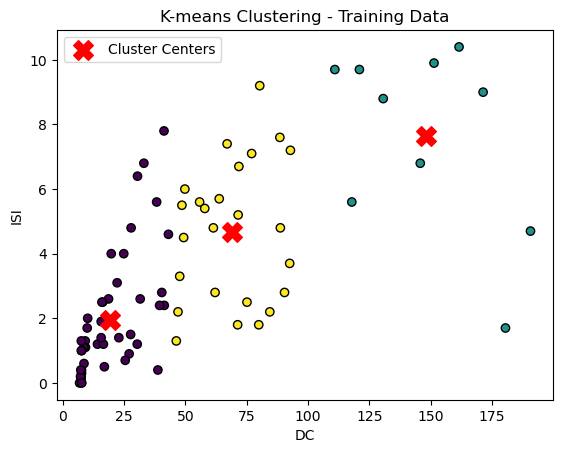

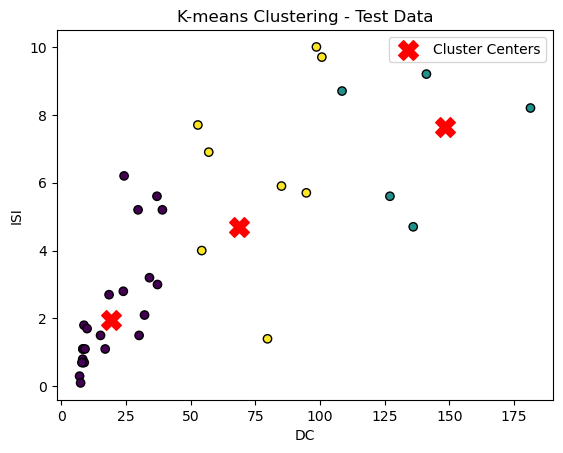

In [43]:
# 'DC'. 'ISI'에 대한 K-means clustering 수행
kmeans_clustering(X_train1, X_test1, num_clusters=3)

- train data를 clustering한 결과 첫 번째 클러스터는 'DC' 변수가 0 이상 50 이하, 'ISI' 변수가 0 이상 8 이하로 나타났고, 두 번째 클러스터는 'DC' 변수가 50 이상 100 이하, 'ISI' 변수가 1 이상 10 이하로 나타났으며, 세 번째 클러스터는 'DC' 변수가 100 이상, 'ISI' 변수가 2 이상 범위로 나타났다.
- test data를 clustering한 결과 첫 번째 클러스터는 'DC' 변수가 0 이상 50 이하, 'ISI' 변수가 0 이상 7 이하로 나타났고, 두 번째 클러스터는 'DC' 변수가 50 이상 100 이하, 'ISI' 변수가 1 이상 10 이하로 나타났으며, 세 번째 클러스터는 'DC' 변수가 100 이상, 'ISI' 변수가 4 이상 범위로 나타났다.

C:\Users\eun04\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers:
 [[ 19.35869565  29.82608696]
 [148.1         34.6       ]
 [ 68.836       31.84      ]]


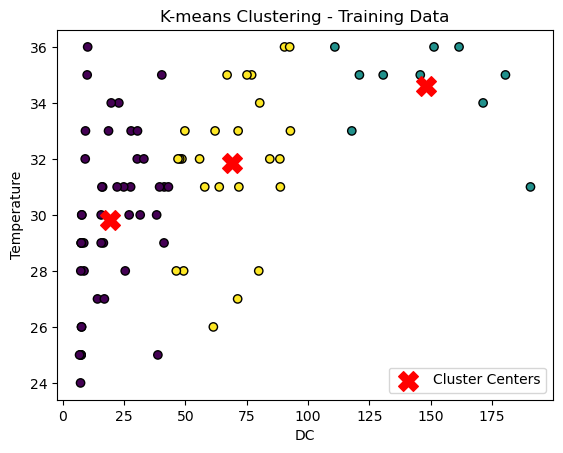

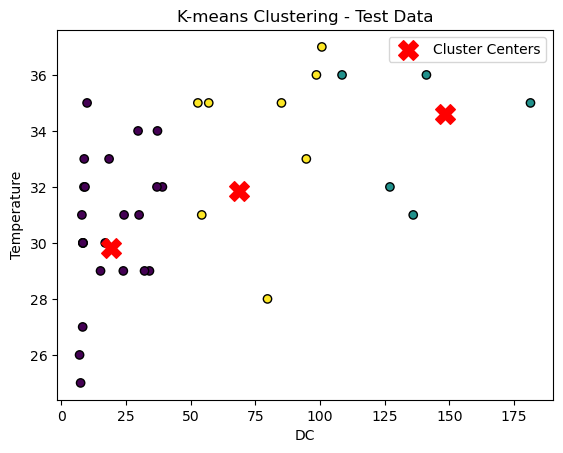

In [44]:
# 'DC'. 'Temperature'에 대한 K-means clustering 수행
kmeans_clustering(X_train2, X_test2, num_clusters=3)

- train data를 clustering한 결과 첫 번째 클러스터는 'DC' 변수가 0 이상 50 이하, 'Temperature' 변수가 24 이상 36 이하로 나타났고, 두 번째 클러스터는 'DC' 변수가 50 이상 100 이하, 'Temperature' 변수가 26 이상 36 이하로 나타났으며, 세 번째 클러스터는 'DC' 변수가 100 이상, 'Temperature' 변수가 30 이상 36 이하의 범위로 나타났다.
- test data를 clustering한 결과 첫 번째 클러스터는 'DC' 변수가 0 이상 50 이하, 'Temperature' 변수가 24 이상 35 이하로 나타났고, 두 번째 클러스터는 'DC' 변수가 50 이상 100 이하, 'Temperature' 변수가 28 이상으로 나타났으며, 세 번째 클러스터는 'DC' 변수가 100 이상, 'Temperature' 변수가 30 이상 36 이하의 범위로 나타났다.

C:\Users\eun04\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers:
 [[ 1.04285714 27.5       ]
 [ 8.02941176 33.76470588]
 [ 3.27222222 32.5       ]]


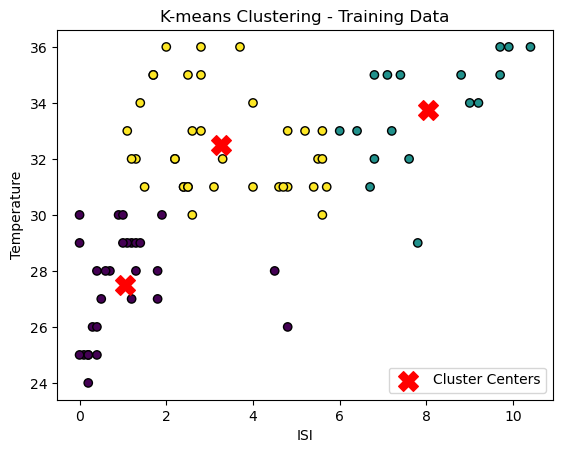

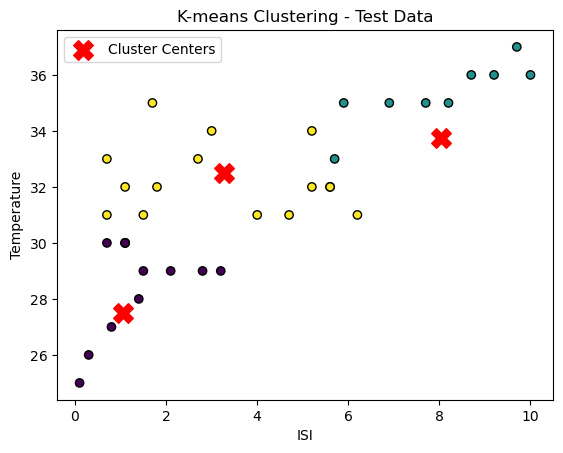

In [45]:
# 'ISI'. 'Temperature'에 대한 K-means clustering 수행
kmeans_clustering(X_train3, X_test3, num_clusters=3)

- train data를 clustering한 결과 첫 번째 클러스터는 'ISI' 변수가 0 이상 5 이하, 'Temperature' 변수가 24 이상 30 이하로 나타났고, 두 번째 클러스터는 'ISI' 변수가 1 이상 6 이하, 'Temperature' 변수가 30 이상 36 이하로 나타났으며, 세 번째 클러스터는 'ISI' 변수가 6 이상, 'Temperature' 변수가 29 이상 36 이하의 범위로 나타났다.
- test data를 clustering한 결과 첫 번째 클러스터는 'ISI' 변수가 0 이상 4 이하, 'Temperature' 변수가 24 이상 30 이하로 나타났고, 두 번째 클러스터는 'ISI' 변수가 1 이상 6 이하, 'Temperature' 변수가 30 이상 36 이하로 나타났으며, 세 번째 클러스터는 'ISI' 변수가 6 이상, 'Temperature' 변수가 32 이상 범위로 나타났다.

3개의 종속 변수에 대한 클러스터링을 진행한 결과 train data와 test data의 분포가 모두 비슷함을 확인하였다.

# 6. Linear Regression

<Axes: >

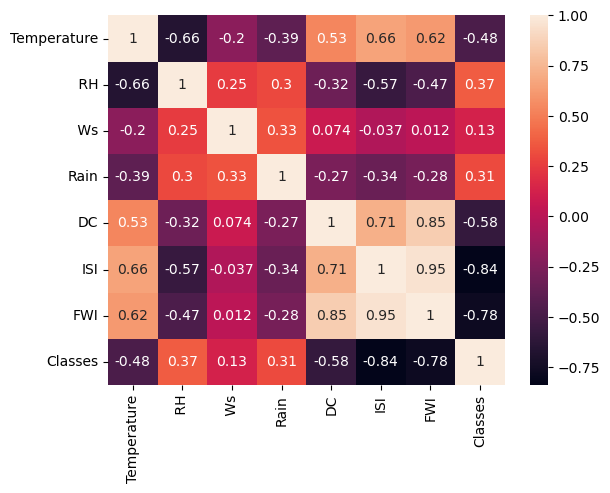

In [46]:
sns.heatmap(df.corr(), annot=True)

## 6-1. Linear Regression with sklearn

In [47]:
import math
import seaborn as sns
import pandas as pd

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [48]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")
df.columns = [x.rstrip() for x in df.columns]

#label encoding
df['Classes'].replace({'fire': 0, 'not fire': 1}, inplace=True)
df = df.drop(['day', 'month', 'year', 'FFMC', 'DMC', 'BUI', 'Classes'], axis=1)

In [49]:
# 독립 변수와 종속 변수 설정
X = df.drop(['FWI'],axis=1)
y = df['FWI']

In [50]:
# train set/test set 분리
X_train_bf, X_test_bf, y_train_bf, y_test_bf = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# 모델 초기화 및 학습
model_bf = LinearRegression()
model_bf.fit(X_train_bf, y_train_bf)

LinearRegression()

In [52]:
# 학습한 weight 확인
print(model_bf.coef_)

[ 0.02663976  0.02890136 -0.08507094  0.28437905  0.05374102  1.39365659]


In [53]:
# 학습 데이터 예측 및 테스트 데이터에 대한 예측
y_train_bf_pred = model_bf.predict(X_train_bf)
y_test_bf_pred = model_bf.predict(X_test_bf)

In [54]:
# Training data 성능 계산
print('MSE score in Training data : ', mean_squared_error(y_train_bf_pred,y_train_bf))
print('R2 in Training data : ', r2_score(y_train_bf_pred,y_train_bf))

MSE score in Training data :  0.6724281997537668
R2 in Training data :  0.981542180946609


In [55]:
# Test data 성능 계산
print('MSE score in Test data : ', mean_squared_error(y_test_bf_pred,y_test_bf))
print('R2 in Test data : ', r2_score(y_test_bf_pred,y_test_bf))

MSE score in Test data :  2.324165346706174
R2 in Test data :  0.9423520888602249


In [56]:
#train과 test의 MSE 계산 과정
x = X_train_bf.to_numpy()
xtx = np.matmul(x.T , x)
xtx_inv = np.linalg.inv(xtx)

W = np.matmul(np.matmul(xtx_inv , x.T), y_train_bf)

#Calculate SSE in train data
predicted_y_train = np.matmul(X_train_bf.to_numpy(), W)
residuals_train = (y_train_bf- predicted_y_train)

#MSE in training data
print("MSE in training data", (residuals_train*residuals_train).mean())

#alculate SSE in test data
predicted_y_test = np.matmul(X_test_bf.to_numpy(), W)
residuals_test = (y_test_bf - predicted_y_test)

#MSE in test data
print("MSE in test data", (residuals_test*residuals_test).mean())

MSE in training data 0.7057369806846611
MSE in test data 2.1435146687301443


Pearson correlation coefficient matrix of each variables:



C:\Users\eun04\AppData\Local\Temp\ipykernel_26664\1611435007.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


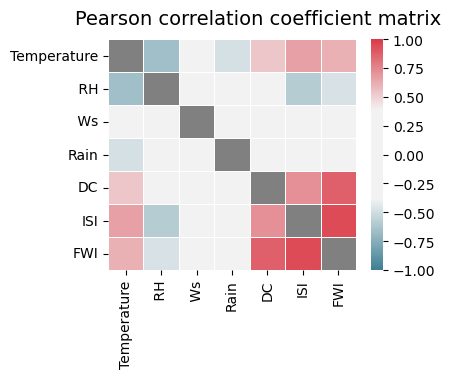

In [57]:
#히트맵을 이용하여 예측변수 간의 상관관계가 있는지 확인.
corr = df.corr()
print('Pearson correlation coefficient matrix of each variables:\n')

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)


In [58]:
#예측변수 사이에 너무 큰 상관관계(공선성)이 있음을 분산팽창요인을 통해 확인
#vif>10 이면 다중공선성 존재

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [round(variance_inflation_factor(df.values, i), 3) for i in range(len(df.columns))]
vif_data

,feature,VIF
0,Temperature,55.869
1,RH,41.786
2,Ws,38.877
3,Rain,1.763
4,DC,17.342
5,ISI,56.934
6,FWI,67.994


- 다중공선성이 있음을 파악.

## 6-2. PCA

In [59]:
#주성분 분석
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize the dataframe
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)

# Convert the normalized array back to a dataframe
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

pca = PCA(n_components=df_normalized.iloc[:,1:].shape[1])

principalComponents = pca.fit_transform(df_normalized.iloc[:,1:])
pc_columns = ["PC" + str(i) for i in range(1, pca.n_components_ + 1)]

principalDf = pd.DataFrame(data=principalComponents, columns=pc_columns)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.831167,-0.410142,0.587805,-1.514291,0.331053,-0.169707
1,-1.060558,-1.371280,0.798965,0.072252,0.336159,-0.135317
2,-3.532433,3.872974,2.418612,1.272556,-0.054658,0.091969
3,-2.355337,-0.478380,-0.674603,1.388278,-0.247765,-0.131708
4,-1.410432,-0.404206,-0.663905,-0.235129,-0.120595,-0.054417


In [60]:
# 고유벡터와 고유값 계산
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

print([round(x,2) for x in eigenvalues])

[3.23, 1.37, 0.68, 0.53, 0.23, 0.02]


In [61]:
# eigenvalue가 0에 가까운 것은 공선성이 있다는 뜻
print("PC6:")
print(" + ".join(["".join([str(round(x, 3)), "X", str(ind+1)]) for ind, x in enumerate(eigenvectors[-1])]), "~= 0")

PC6:
0.047X1 + -0.017X2 + 0.059X3 + 0.297X4 + 0.567X5 + -0.765X6 ~= 0


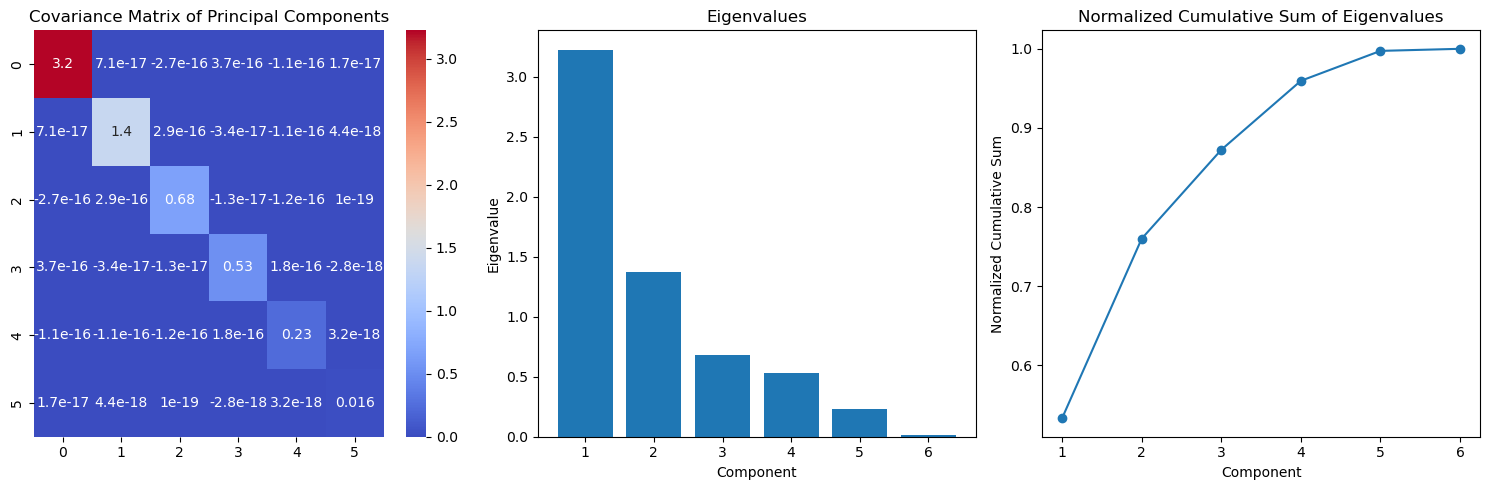

In [62]:
# Calculate the covariance matrix of the principal components
cov_matrix = np.cov(principalComponents.T)

# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the heatmap of the covariance matrix on the first subplot
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Covariance Matrix of Principal Components')

# Plot the bar plot of the eigenvalues on the second subplot
axs[1].bar(range(1,len(eigenvalues)+1), eigenvalues)
axs[1].set_xlabel('Component')
axs[1].set_ylabel('Eigenvalue')
axs[1].set_title('Eigenvalues')

# Normalize the cumulative sum to 1
cumulative_sum = np.cumsum(eigenvalues)
normalized_cumulative_sum = cumulative_sum / np.sum(eigenvalues)

# Plot the normalized cumulative sum on the third subplot
axs[2].plot(range(1, len(eigenvalues) + 1), normalized_cumulative_sum, marker='o')
axs[2].set_xlabel('Component')
axs[2].set_ylabel('Normalized Cumulative Sum')
axs[2].set_title('Normalized Cumulative Sum of Eigenvalues')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [63]:
import statsmodels.api as sm

# Add the target variable to the principal components dataframe
principalDf['target'] = df_normalized['FWI']

principalDf_regr = principalDf.loc[:,['PC1','PC2','target']] #PC1과 PC2를 이용하여 차원축소

# Split the data into training and testing sets
train_data = principalDf_regr.sample(frac=0.7, random_state=1)
test_data = principalDf_regr.drop(train_data.index)

# Separate the target variable from the features
train_X = train_data.iloc[:, :-1]
train_y = train_data['target']
test_X = test_data.iloc[:, :-1]
test_y = test_data['target']


# Add a constant column to the features
train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

# Fit the regression model
model = sm.OLS(train_y, train_X)
results = model.fit()

# Print the summary of the regression model
print(results.summary())


# PCA과정을 통해 차원을 축소하고 변수간의 공선성을 없애 결정계수를 높이고 F통계량이 높아져 전체적인 모델 설명력이 좋아졌음을 알 수 있다.

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     978.0
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           6.15e-58
Time:                        18:51:03   Log-Likelihood:                 11.088
No. Observations:                  85   AIC:                            -16.18
Df Residuals:                      82   BIC:                            -8.847
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0107      0.024      0.454      0.6

## 6-3. Using regularized methods for regression

In [64]:
from sklearn.linear_model import Ridge
import sklearn.metrics as mt

ridge = Ridge(alpha=5.0)
ridge.fit(X_train_bf, y_train_bf)
y_train_pred_ridge = ridge.predict(X_train_bf)
y_test_pred_ridge = ridge.predict(X_test_bf)

print("Ridge : " ,ridge.coef_)
print("Ridge r2 : ", mt.r2_score(y_test_bf, y_test_pred_ridge))

# 0에 가까운 변수들 제거

Ridge :  [ 0.03180521  0.026258   -0.08018792  0.27211341  0.0545634   1.36123235]
Ridge r2 :  0.9475590244408124


In [65]:
#Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train_bf, y_train_bf)
y_train_pred_lasso = lasso.predict(X_train_bf)
y_test_pred_lasso = lasso.predict(X_test_bf)

print("Lasso : ",lasso.coef_)
print("Lasso r2 : ", mt.r2_score(y_test_bf, y_test_pred_lasso))

# 0에 가까운 변수들 제거

Lasso :  [ 0.         -0.         -0.          0.          0.06259064  1.048917  ]
Lasso r2 :  0.9264984542191584


## 6-4. 공선성을 유발하는 변수를 제거한 데이터프레임을 이용해 linear regression

In [66]:
df_cut = pd.DataFrame(df[['Temperature','DC', 'Rain', 'ISI']]) #'Temperature','DC', 'Rain', 'ISI'만 이용해 새로운 데이터프레임 생성

vif_data = pd.DataFrame()
vif_data['feature'] = df_cut.columns
vif_data['VIF'] = [round(variance_inflation_factor(df_cut.values, i), 3) for i in range(len(df_cut.columns))]
vif_data

#vif가 10보다 작아져 변수 사이에 선형관계(공선성)가 사라졌음을 확인할 수 있다.

,feature,VIF
0,Temperature,3.701
1,DC,4.274
2,Rain,1.232
3,ISI,5.771


Pearson correlation coefficient matrix of each variables:



C:\Users\eun04\AppData\Local\Temp\ipykernel_26664\1271768013.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_cut.corr(), dtype=np.bool)


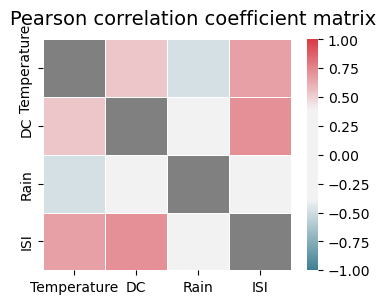

In [67]:
#히트맵을 이용하여 예측변수 간의 상관관계가 있는지 확인.
print('Pearson correlation coefficient matrix of each variables:\n')

# Generate a mask for the diagonal cell
mask = np.zeros_like(df_cut.corr(), dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_cut.corr(), mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)

In [68]:
X_cut = pd.DataFrame(df[['Temperature','DC', 'Rain', 'ISI']])
y_cut = df['FWI']

X_train_af, X_test_af, y_train_af, y_test_af = train_test_split(X_cut, y_cut, test_size=0.3, random_state=21)

X_train_af = sm.add_constant(X_train_af)
X_test_af = sm.add_constant(X_test_af)

model_train_af = sm.OLS(y_train_af, X_train_af).fit()
model_test_af = sm.OLS(y_test_af, X_test_af).fit()

print('MSE score in Training data : ', model_train_af.mse_resid)
print('R2 in Training data : ', model_train_af.rsquared)

print('MSE score in Test data : ', model_test_af.mse_resid)
print('R2 in Test data : ', model_test_af.rsquared)

#r2 값 향상된것을 확인할 수 있다.

MSE score in Training data :  1.1090911425179573
R2 in Training data :  0.9741173760462358
MSE score in Test data :  0.9931272828697935
R2 in Test data :  0.9777915351898359


In [69]:
model_train_af.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FWI   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     752.7
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.32e-62
Time:                        18:51:04   Log-Likelihood:                -122.43
No. Observations:                  85   AIC:                             254.9
Df Residuals:                      80   BIC:                             267.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9124      1.563      0.584      0.561      -2.198       4.023
Temperature    -0.1174      0.052     -2.236      0.028      -0.222      -0.013
DC              0.0466      0.003     15.368      0.000       0.041       0.053
Rain            0.2074      0.088      2.355      0.021       0.032       0.383
ISI             1.5566      0.060     25.903      0.000       1.437       1.676
==============================================================================
Omnibus:                       10.281   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               27.266
Skew:                          -0.042   Prob(JB):                     1.20e-06
Kurtosis:                       5.773   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. 전체 변수를 사용한 회귀모델은 결정계수는 높지만 train셋을 사용한 모델과 test을 사용한 모델 사이의 차이가 발생했다.
2. 변수끼리의 상관관계를 살펴본 결과 변수 사이에 공선성이 존재함을 파악하였고, 공선성으로 인한 과적합을 예방하기 위해 PCA와 regularization regression을 진행하였다.
3. PCA를 진행하여 차원을 축소하였고 변수 사이의 공선성을 제거하였으며, F통계량을 통해 모델의 설명력이 높아졌음을 알 수 있었다.
4. regularization regression에서 Ridge와 Lasso를 진행하여 변수들을 제거하였고 변수가 제거된 새 데이터를 이용하여 회귀모델을 만든 결과, train셋을 사용한 모델과 test을 사용한 모델 사이의 차이가 좁혀져 과적합을 방지할 수 있었고, MSE또한 작아졌으며 처음 모델보다 F통계량이 커졌기때문에 모델의 설명력 또한 좋아졌음을 확인할 수 있었다. 첫번째 모델의 test의 R2는 0.95이지만 두번째 모델의 test의 R2는 0.97로 성능 또한 좋아졌다.

# 7. Nonlinear regression

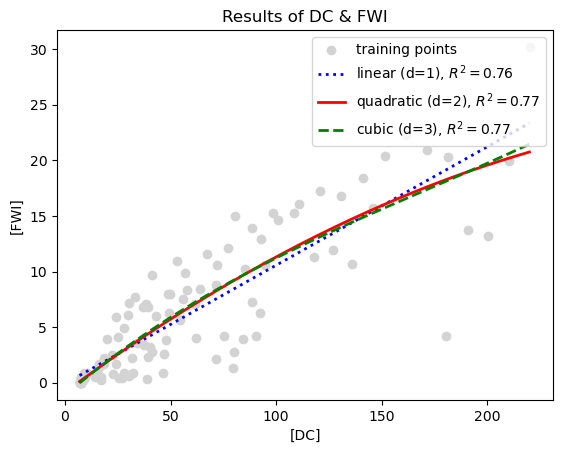

In [70]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['DC']].values
y = df['FWI'].values

# 모델 초기화
regr = LinearRegression()

# 2차 및 3차 다항식 특성 생성
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

# 1차
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# 2차
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# 3차
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot 결과
plt.scatter(X, y, label='training points', color='lightgray')

# 1차 plot
plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2,
         linestyle=':')

# 2차 plot
plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red',
         lw=2,
         linestyle='-')

# 3차 plot
plt.plot(X_fit, y_cubic_fit,
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green',
         lw=2,
         linestyle='--')

plt.xlabel('[DC]')
plt.ylabel('[FWI]')
plt.title('Results of DC & FWI')
plt.legend(loc='upper right')

plt.show()

- DC 값이 증가함에 따라 FWI도 증가하는 경향을 확인할 수 있으며, 2차(quadratic)와 3차(cubic) 다항 회귀에서 R2 값이 높게 나타났다.

- 2차 혹은 3차 다항 회귀 모델을 사용하는 것이 적합하다.

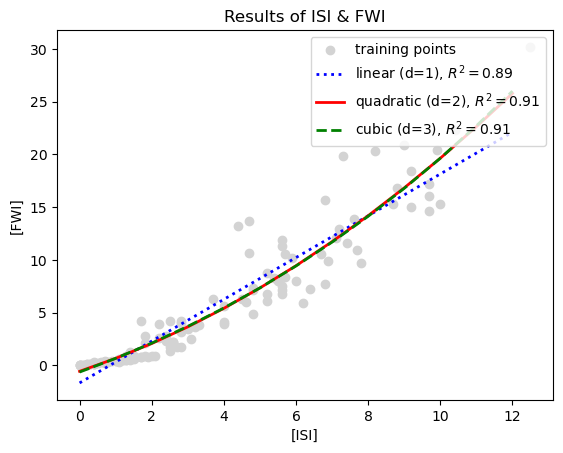

In [71]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['ISI']].values
y = df['FWI'].values

# 모델 초기화
regr = LinearRegression()

# 2차 및 3차 다항식 특성 생성
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

# 1차
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# 2차
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# 3차
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot 결과
plt.scatter(X, y, label='training points', color='lightgray')

# 1차 plot
plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2,
         linestyle=':')

# 2차 plot
plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red',
         lw=2,
         linestyle='-')

# 3차 plot
plt.plot(X_fit, y_cubic_fit,
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green',
         lw=2,
         linestyle='--')

plt.xlabel('[ISI]')
plt.ylabel('[FWI]')
plt.title('Results of ISI & FWI')
plt.legend(loc='upper right')

plt.show()

- ISI 값이 증가함에 따라 FWI도 증가하는 경향을 확인할 수 있으며, 2차(quadratic)와 3차(cubic) 다항 회귀에서 R2 값이 높게 나타났다.

- 2차 혹은 3차 다항 회귀 모델을 사용하는 것이 적합하다.

# 8. Polynomial Regression

In [72]:
from sklearn.model_selection import train_test_split

X, y = df[['DC']].values, df['FWI'].values

# stratify는 y의 class별 개수를 유지시킴
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [73]:
# 다항 회귀를 시각화하는 함수 'drqw_nonlinear_lr' 정의
def draw_nonlinear_lr(degree  = 2):
    # 모델 초기화
    regr = LinearRegression()

    # 다항식 특성 생성
    quadratic = PolynomialFeatures(degree=degree)
    X_train_poly = quadratic.fit_transform(X_train)
    X_test_poly = quadratic.fit_transform(X_test)

    X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

    regr = regr.fit(X_train_poly, y_train)
    y_lin_fit = regr.predict(quadratic.fit_transform(X_fit))
    train_linear_r2 = r2_score(y_train, regr.predict(X_train_poly))
    test_linear_r2 = r2_score(y_test, regr.predict(X_test_poly))

    # 시각화 및 결과 출력
    plt.scatter(X_train, y_train, label='training points', color='lightgray')
    plt.scatter(X_test, y_test, label='test points', color='red', alpha=0.1)

    print('Train R2 :',train_linear_r2)
    print('Test R2 :',test_linear_r2)
    plt.plot(X_fit, y_lin_fit,
             color='blue',
             lw=2,
             linestyle=':')
    plt.legend()
    plt.title(f'DC & FWI (Degree {degree})')
    plt.show()

Train R2 : 0.8043639748347314
Test R2 : 0.6245013357029721


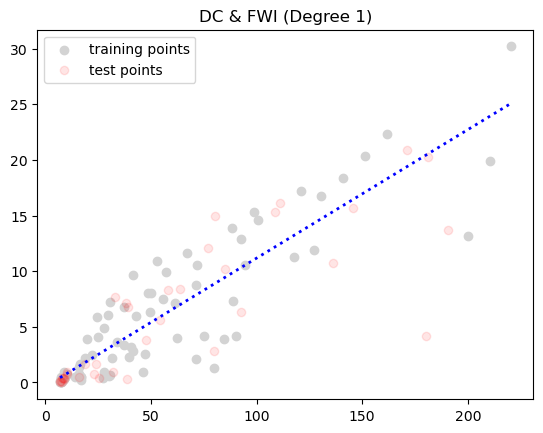

In [74]:
# 1차
draw_nonlinear_lr(1)

Train R2 : 0.8060359907883954
Test R2 : 0.6406424403178713


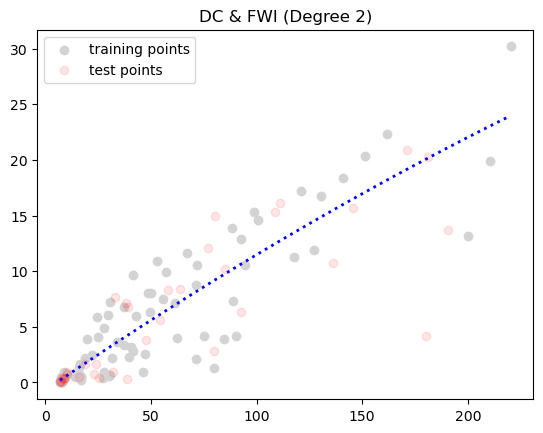

In [75]:
# 2차
draw_nonlinear_lr(2)

Train R2 : 0.8338790856218429
Test R2 : 0.6955307927077816


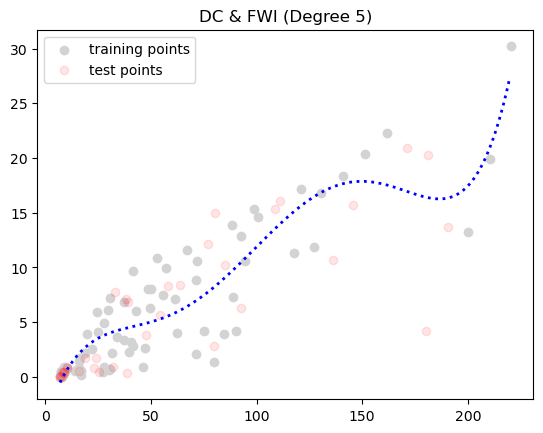

In [76]:
# 5차
draw_nonlinear_lr(5)

Train R2 : 0.7103405579437376
Test R2 : 0.5080348924716038


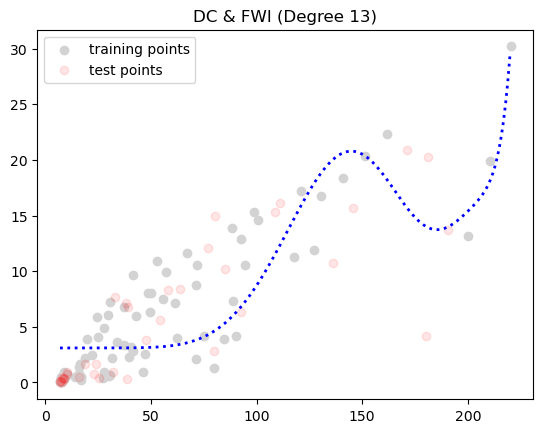

In [77]:
# 13차
draw_nonlinear_lr(13)

-> DC와 FWI의 관계를 봤을 때 차수가 높아질수록 모델이 학습 데이터에 과적합(Overfitting)되어, train model에서만 높은 성능을 보이고 test model에서는 예측 성능이 비교적 크게 떨어짐을 확인함.

# 결과
> ### 1. classification
>>> 1. 표준화된 test data에 대한 KNN 모델의 정확도를 계산한 결과, 'DC'와 'ISI를 독립변수로 설정한 X1 모델의 정확도가 1.0으로 가장 높았다. 하지만, 이는 정확도가 높음과 동시에 과적합 발생 가능성이 높음을 의미하는 결과이기 때문에 예측을 수행할 때 고려하는 이웃의 수를 의미하는 매개변수 값을 조정하여 더 일반화된 모델로 재분류를 진행하는 방법을 택하였다. 재분류한 모델의 정확도를 측정한 결과 0.97로 낮아짐을 확인하였다.
>>> 2. 모든 모델에 대하여 과적합 발생 가능성을 고려하기 위해 최적의 매개변수 값을 찾고, 이를 적용했을 때 KNN 모델의 정확도 값을 도출하였다. 이 결과 독립변수 X1은 매개변수 값이 1일 때 0.94의 정확도를, 독립변수 X2는 매개변수 값이 9일 때 0.81의 정확도를, 독립변수 X3은 매개변수 값이 3일 때 0.94의 정확도를 나타낸다는 사실을 확인할 수 있었다.
>>> 3. 최적의 매개변수 값을 설정하여 KNN 모델의 정확도를 측정한 결과, 'DC'와 'ISI'를 독립변수로 설정한 X1과 'ISI'와 'Temperature'를 독립변수로 설정한 X3 모델의 정확도가 가장 높음을 확인하였다.
> ### 2. regression
>> #### 1. Linear regression
>>>    1. FWI(화재 잠재력)을 target으로 정하고 나머지 변수들을 예측변수로 설정한 후 회귀 모델을 만들었을 때의 성능은 train set일 때 R2는 0.98이고 test set 일 때는 0.94로 조금의 차이가 나는 것을 알 수 있었다. 또, test일때의 높은 MSE를 가지고 있기 때문에 공선성을 의심해볼 수 있다.
따라서 test를 진행할 때의 모델 성능을 높이기 위한 과정을 진행하였다.  
>>>    2.  주성분 분석을 통해 차원을 축소했을 경우 R2가 0.96이며 F통계량이 978.0으로 굉장히 높은 모델 적합도를 가지며 성능을 높일 수 있었다.
>>>    3. Lasso, Ridge 를 진행한 결과 coefficient가 0에 가까운 변수들을 찾아 데이터셋에서 제거하였고, 새롭게 만든 데이터 셋을 이용하여 vif를 검사한 결과 공선성이 제거된 것을 확인할 수 있었다.새롭게 만든 데이터셋을 이용하여 만든 회귀모델은 train set에서 0.97, test셋에서도 0.97로 성능 차이가 거의 없고, 변수 전부 사용한 모델보다 성능이 올라간 것을 확인할 수 있었다. MSE 또한 2.32에서 0.99로 줄여 모델의 적합성을 높일 수 있었다.
>> #### 2. Nonlinear regression
>>>    1. 독립 변수 X는 'DC', 종속 변수 y는 'FWI' 열의 값으로 구성한 후 각각의 다항 회귀 모델을 생성한 후 결과를 시각화한 결과, R2값이 0.77로 가장 높은 2차와 3차 다항 회귀 모델 사용이 가장 적합함을 확인했다.
>>>    2. 독립 변수 X는 'ISI', 종속 변수 y는 'FWI' 열의 값으로 구성한 후 각각의 다항 회귀 모델을 생성한 후 결과를 시각화한 결과, R2값이 0.91로 가장 높은 2차와 3차 다항 회귀 모델 사용이 가장 적합함을 확인했다.
>> #### 3. Polynomial Regression
>>>    1. X를 'DC', y를 'FWI'로 설정했을 때 차수 별로 다항 회귀를 시각화한 결과, 1차보다는 5차에서 예측 성능이 좋은 것을 확인했지만 그 이상의 차수가 높아질 수록 Trian R2 값과 Test R2 값의 차이가 커지면서 예측 성능이 비교적 떨어짐을 확인했다.